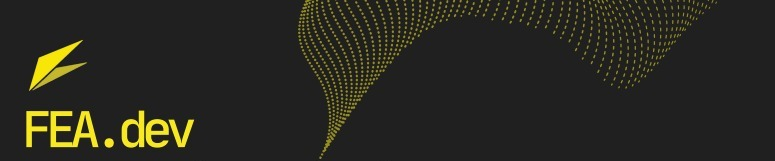


# Fala devs, blz?? 

Esta será nossa quinta lista de exercícios para você testar seu conhecimento acerca do conteúdo do MÓDULO 3:

-Pandas I

## INSTRUÇÕES:

A lista deve ser realizada pelo Jupyter Notebook.

Nâo é necessário entregar a lista para afins de certificado dentro da plataforma, entretanto para alunos da USP que queiram participar do processo seletivo ou conseguir créditos AAC (apenas FEANOS) é necessária a entrega de TODAS as listas.

A entrega das listas ou pelo menos sua excecução é recomendada a fim de exercitar todo o conhecimento adquirido do curso.

O DESAFIO é para realmente te desafiar, por isso não desista de tentar e de continuar com o curso, ao longo das listas você verá que cada vez mais você terá ferramentas para completá-lo.

Caso haja alguma dúvida acerca da lista participe das monitorias que serão oferecidas as quintas e sábados das 17h as 18h pelo DISCORD. Caso seu problema não seje resolvido envie uma mensagem para contato.feadev@gmail.com

O gabarito será disponibilizado na plataforma após o término de periodo de envio



In [1]:
## vamos começar??

Toda nossa lista 5 abordará uma temática única de acordo com a base de dados escolhida para a realização da mesma.

**PAÍSES MENOS CORRUPTOS SÃO MAIS FELIZES?**

Será que a felicidade e a corrupção têm alguma relação? A resposta a essa pergunta não é tão clara quanto gostaríamos que fosse. A felicidade é o que todos desejam, enquanto a corrupção é frequentemente vista como algo que a sociedade deve combater. No entanto, a conexão direta entre esses dois conceitos é desafiadora de estabelecer.

A corrupção é prejudicial, pois mina a confiança nas instituições públicas e distorce a alocação de recursos. Isso certamente não soa como um ingrediente para a felicidade. No entanto, em muitos lugares, a corrupção é endêmica, mas as pessoas ainda relatam altos níveis de felicidade. Isso nos faz questionar se a percepção de felicidade pode ser independente da corrupção.

Talvez as pessoas se adaptem à corrupção, ou talvez outros fatores, como economia e segurança, desempenhem um papel mais significativo em sua felicidade. Em última análise, a relação entre felicidade e corrupção é complexa, e as respostas podem variar dependendo do contexto.

Portanto, a questão persiste: **será que a corrupção realmente impede a felicidade? Ou será que a felicidade pode ser encontrada em meio à corrupção?**

vamos utilizar da base de dados Happiness and Corruption 2015-2020

https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

para chegar em alguma conclusão sobre o tema

## QUESTÃO 0

Carregue os dados do arquivo "happiness_corruption.csv" em um DataFrame e mostre as primeiras 5 linhas do DataFrame 

baixe a base pelo link abaixo: https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

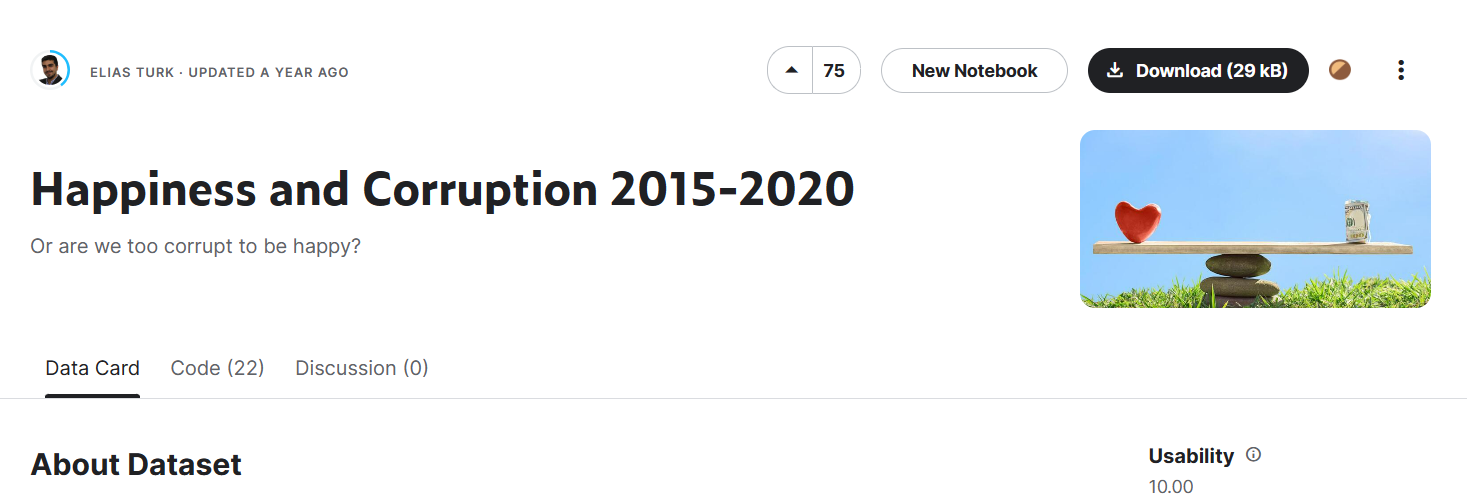

In [104]:
#seu código começa aqui


## QUESTÃO 1


**Exploração Inicial dos Dados**

a) Verifique o número de linhas e colunas no DataFrame. **lembre-se do método .shape**


In [105]:
#seu codigo começa aqui



b) Liste as colunas presentes no DataFrame. **lembre-se do método .columns**


In [106]:
#seu codigo começa aqui


c) Verifique se há valores nulos em cada coluna.

In [107]:
#seu codigo começa aqui



## QUESTÃO 2

a) Remova as colunas não relevantes que não serão usadas na análise, como "generosity" (generosidade), "family"(familia),
"health"( saúde), "freedom" (liberdade), "dystopia_residual"(distopia residual), "social_support" (suporte social) e "cpi_score"

In [108]:
#seu codigo começa aqui


b) 
Renomeie as colunas para torná-las mais descritivas. Por exemplo, renomeie "Score" para "Pontuacao_Felicidade", "Country" para "Países", "GDP per capita" para "PIB_Per_Capita", "continent" para "Continentes", "Year" para "ano" e government_trust para "confian_gov".

In [33]:
#seu codigo começa aqui

## QUESTÃO 3



**Estatísticas Descritivas**

Calcule estatísticas descritivas para as colunas relevantes: "Score" (pontuação de felicidade), "GDP per capita" (PIB per capita) e "Corruption Perception" (percepção de corrupção) e . Mostre a média, mediana, desvio padrão, mínimo e máximo para cada uma dessas colunas.

In [3]:
# seu código começa aqui 

## QUESTÃO 4

Vamos usar somente o ano de 2019 para facilitar a análise.

a) Incluir no dataframe apenas as linhas do ano de 2019

In [66]:
#seu codigo começa aqui


b) Criar um novo DataFrame com países que têm pontuação de felicidade acima da média global ( do exercicio anterior)

In [109]:

#seu codigo começa aqui

# QUESTÃO 5

**Classificação**

Classifique o DataFrame resultante do Exercício 4 pela coluna "Score" em ordem decrescente. Mostre os 10 países com as maiores pontuações de felicidade. Isso é útil para responder a perguntas como:

Quais países têm os maiores níveis de felicidade? A classificação em ordem decrescente fornece uma lista dos países com as maiores pontuações de felicidade, destacando aqueles que estão no topo da lista.

Houve alguma mudança significativa na classificação da felicidade ao longo do tempo? Comparando a classificação em diferentes anos, é possível identificar se houve mudanças significativas na pontuação de felicidade de países específicos.

Quais países são modelos de sucesso em termos de felicidade? A classificação ajuda a identificar países que são frequentemente citados como exemplos de sucesso em termos de bem-estar e qualidade de vida.

In [110]:
#SEU CÓDIGO COMEÇA AQUI##



## QUESTÃO 6

**Agrupando Dados por Região**

Agrupe os dados por região (coluna "Region") e calcule a média das pontuações de felicidade para cada região. Ordene as regiões pela média de pontuação de felicidade em ordem decrescente.

In [111]:
### Seu código começa aqui  lembre do groupy.by


## QUESTÃO 7

**Lidando com Dados Ausentes**

Verifique se há dados ausentes no DataFrame e, se houver, retire a linha inteira em questão. Certifique-se de que o DataFrame não possui mais dados ausentes após o preenchimento.

In [112]:
#seu código começa aqui



# Questão 8

Agora você tem uma base de dados limpa e com informações relevantes para responder algumas questões.

- Países mais ricos são mais felizes? 
- Países com maior confiança no governo (menos experiencias com corrupção) são mais felizes?
- Aonde se localizam os países mais felizes? Europa? Ásia?....


**Países com maior confiança no governo são mais felizes?**

a) Calcule a média da coluna "Confianca_Gov" para obter um valor médio que será usado como ponto de corte.

In [113]:
#seu codigo começa aqui

b) Com base na média calculada, crie uma nova coluna no DataFrame que atribuirá um rótulo ("alta" ou "baixa") a cada país de acordo com sua confiança no governo em relação à média.

In [11]:
#seu codigo começa aqui

# Função para atribuir os rótulos "alta" ou "baixa" com base na média

def 



# Aplique a função para criar a nova coluna de rótulos

data['Rotulo_Confianca'] = data['Confianca_Gov'].apply(rotulo_confianca)  #O método apply é usado para aplicar uma função a cada valor da coluna "Confianca_Gov". Neste caso, a função rotulo_confianca é aplicada a cada valor individual da coluna.

# Exiba as primeiras linhas do DataFrame com a nova coluna

print(data.head())

c) Após dividir os países em grupos, calcule a média da pontuação de felicidade para cada grupo separadamente.


In [114]:
#seu codigo começa aqui


d) Use um gráfico de barras para representar a relação entre o nível de confiança no governo e a média da pontuação de felicidade. Cada barra no gráfico representa um grupo (alta ou baixa) e a altura da barra representa a média da pontuação de felicidade para esse grupo.

In [ ]:
# seu codigo começa aqui

plt.figure(figsize=(10, 6))
media_por_grupo.plot(kind='bar', color='skyblue') ## bar = grafico em barras  ## skyblue é a cor do grafico
plt.title('')  ## dê um titulo 
plt.xlabel('')  ## o que você quer no eixo x
plt.ylabel('')    ## o que você quer no eixo y
plt.xticks(rotation=0)
plt.show()

e) qual é a conclusão de **Países com maior confiança no governo são mais felizes?**

RESPOSTA...............

## QUESTÃO 9

**Países mais ricos são mais felizes?**

a) Crie um gráfico de dispersão (scatter plot) que mostre a relação entre a pontuação de felicidade e o PIB per capita. Coloque a pontuação de felicidade no eixo vertical (y) e o PIB per capita no eixo horizontal (x). Adicione rótulos aos eixos e um título informativo ao gráfico.

In [ ]:
import matplotlib.pyplot as plt

# Defina os dados para os eixos x e y
x = data['']
y = data['']

# Crie o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(x, y, alpha=0.5)  # Cria o scatter plot com transparência

# Adicione rótulos aos eixos
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Exiba o gráfico
plt.show()

b) Qual é a conclusão de **Países mais ricos são mais felizes?**

RESPOSTA  ............

## QUESTÃO 10

**Aonde se localizam os países mais felizes? Europa? Ásia?....**

a) Calcule a média da pontuação de felicidade (Score) em todo o DataFrame.


In [115]:
##seu codigo começa aqui


b) Crie dois DataFrames separados: um com os países com pontuação de felicidade acima da média e outro com os países com pontuação abaixo da média.

In [116]:

##seu codigo começa aqui

c) Para cada um dos dois DataFrames criados no item b, crie subgrupos calculando a contagem de países por continente (coluna "Region"). dica: .value_counts()

In [97]:

##seu codigo começa aqui

d) Calcule a porcentagem que cada continente representa em relação ao total de países em cada grupo.

In [100]:
## lembre-se :porcentagem_acima_da_media = (contagem_acima_da_media / len(acima_da_media)) * 100

##seu codigo começa aqui

e) Crie gráficos de barras que mostrem a porcentagem de cada continente nos grupos de alta felicidade e baixa felicidade.

In [ ]:

##seu codigo começa aqui

import matplotlib.pyplot as plt

# Gráfico de barras para o grupo de alta felicidade

plt.figure(figsize=(10, 6))
plt.bar(porcentagem_acima_da_media.index, porcentagem_acima_da_media)
plt.title('')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

# Gráfico de barras para o grupo de baixa felicidade

### faça a mesma coisa do grafico acima porem para o grupo de baixa felicidade



f)  Qual é a conclusão da questão: **Aonde se localizam os países mais felizes? Europa? Ásia?....**

RESPOSTA ...........

APÓS A LISTA VOCÊ CONSEGUE ENXERGAR ALGUMA CONCLUSÃO SOBRE A QUESTÃO INICIAL DO TEMA?